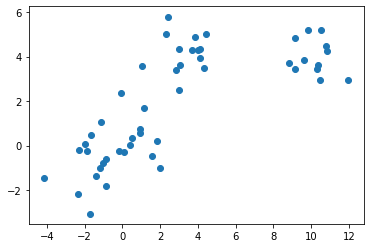

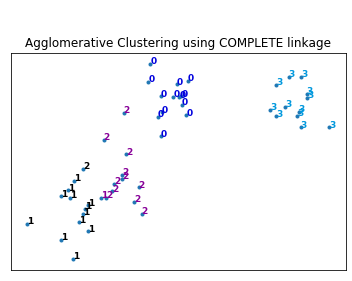

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:67: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


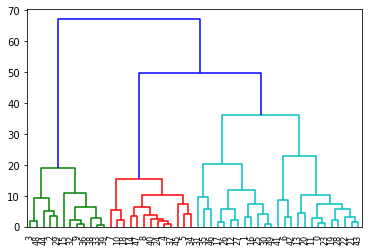

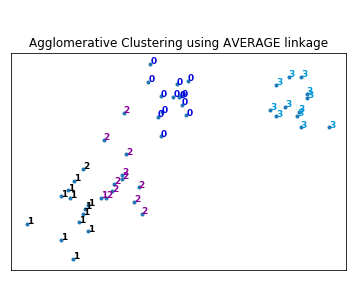

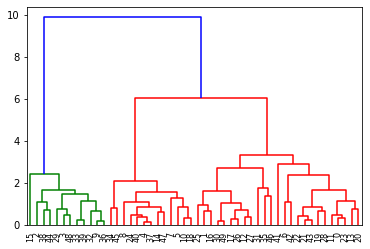

In [26]:
#Agglomerative Clustering random data created by make_blob

import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

#function to scatter the data points that are clustered
def plot_clustering(X1,y1,agglom,message):
    # Create a figure of size 6 inches by 4 inches.
    plt.figure(figsize=(6,4))

    plt.title(label=message,loc='center')
    # These two lines of code are used to scale the data points down,
    # Or else the data points will be scattered very far apart.

    # Create a minimum and maximum range of X1.
    x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

    # Get the average distance for X1.
    X1 = (X1 - x_min) / (x_max - x_min)

    # This loop displays all of the datapoints.
    for i in range(X1.shape[0]):
        # Replace the data points with their respective cluster value 
        # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
        plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
                 color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    # Remove the x ticks, y ticks, x and y axis
    plt.xticks([])
    plt.yticks([])
    #plt.axis('off')
    
    # Display the plot of the original data before clustering
    plt.scatter(X1[:, 0], X1[:, 1], marker='.')
    # Display the plot
    plt.show()
    


X,y = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

plt.scatter(X[:,0],X[:,1], marker='o')




# Agglomerative Clustering using 'Complete' linkage
ag_m = AgglomerativeClustering(n_clusters=4, linkage='average')
ag_m.fit(X,y)

#plot the clusters
plot_clustering(X1=X, y1=y, agglom=ag_m, message = '\n\nAgglomerative Clustering using COMPLETE linkage')

# create distance matrix
d_m = distance_matrix(X,X)
#print(d_m)

z = hierarchy.linkage(d_m,'complete')
dgram = hierarchy.dendrogram(z)


# using Average linkage
ag_m2 = AgglomerativeClustering(n_clusters=4,linkage='average')
ag_m2.fit(X,y)

plot_clustering(X1=X,y1=y,agglom=ag_m2, message='\n\nAgglomerative Clustering using AVERAGE linkage')

z1 = hierarchy.linkage(X,'average')
dgram = hierarchy.dendrogram(z1)